<a href="https://colab.research.google.com/github/danaadcock/707-lecture-master/blob/main/ML_Project_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [3]:
import pandas as pd

# Provide the full path to the file
file_path = "/content/drive/My Drive/x_resampled.csv"

# Read the file with specified encoding
x_resampled = pd.read_csv(file_path, encoding='utf-8')


In [4]:
# Provide the full path to the file
file_path = "/content/drive/My Drive/y_resampled.csv"

# Read the file with specified encoding
y_resampled = pd.read_csv(file_path, encoding='utf-8')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

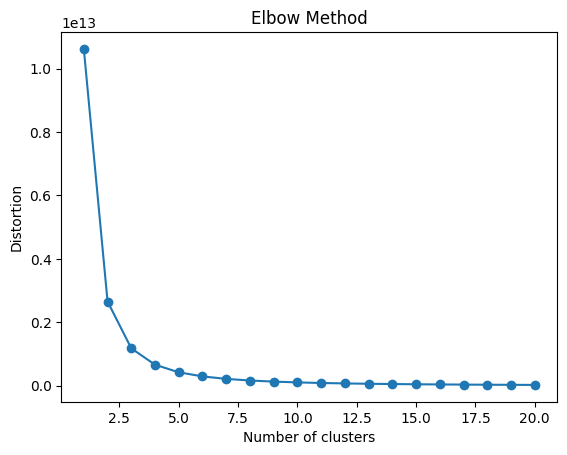

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to calculate the distortion for a range of cluster counts
def calculate_distortion(data, max_clusters):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return distortions

# Function to plot the elbow curve
def plot_elbow_curve(distortions):
    plt.plot(range(1, len(distortions) + 1), distortions, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

# Calculate distortion for a range of cluster counts
max_clusters = 20  # You can adjust this based on your dataset and requirements
distortions = calculate_distortion(x_resampled, max_clusters)

# Plot the elbow curve
plot_elbow_curve(distortions)

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import hdbscan

# Initialize clustering algorithms
kmeans = KMeans(n_clusters=3, random_state=42)
spectral = SpectralClustering(n_clusters=3, random_state=42)
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5)

# Fit and predict clusters for each algorithm
kmeans_labels = kmeans.fit_predict(x_resampled)
spectral_labels = spectral.fit_predict(x_resampled)
hdbscan_labels = hdbscan_clusterer.fit_predict(x_resampled)

# Evaluate ARI and AMI for each algorithm
kmeans_ari = adjusted_rand_score(y_resampled, kmeans_labels)
kmeans_ami = adjusted_mutual_info_score(y_resampled, kmeans_labels)
spectral_ari = adjusted_rand_score(y_resampled, spectral_labels)
spectral_ami = adjusted_mutual_info_score(y_resampled, spectral_labels)
hdbscan_ari = adjusted_rand_score(y_resampled, hdbscan_labels)
hdbscan_ami = adjusted_mutual_info_score(y_resampled, hdbscan_labels)

# Print results
print("Clustering on Raw Data:")
print("k-Means:")
print(f"ARI: {kmeans_ari}, AMI: {kmeans_ami}")
print("Spectral Clustering:")
print(f"ARI: {spectral_ari}, AMI: {spectral_ami}")
print("HDBSCAN:")
print(f"ARI: {hdbscan_ari}, AMI: {hdbscan_ami}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
!pip install umap-learn


In [4]:
!pip install hdbscan